# Individual Scores

- Download files containing losses and f1 scores for each of the tasks trained separately
- Parse out this information
- Plot learning curves

### Get Files

In [2]:
%store -r pruned_dataset

files = pruned_dataset.columns.tolist()

for file in files:
    !mkdir -p /tmp/$file
    
    !scp submit64.cs.utexas.edu:scratch/code/cochrane-nlp/experiments/ct.gov/cnn/output/$file/out /tmp/$file

out                                           100% 8144     8.0KB/s   00:00    
out                                           100% 8837     8.6KB/s   00:00    
out                                           100% 8633     8.4KB/s   00:00    
out                                           100% 8951     8.7KB/s   00:00    
out                                           100% 7848     7.7KB/s   00:00    
out                                           100% 8648     8.5KB/s   00:00    
out                                           100% 7743     7.6KB/s   00:00    
out                                           100% 8946     8.7KB/s   00:00    
out                                           100% 7889     7.7KB/s   00:00    
out                                           100% 7656     7.5KB/s   00:00    
out                                           100% 7808     7.6KB/s   00:00    
out                                           100% 7791     7.6KB/s   00:00    
out                                     

### Aggregate Scores

In [11]:
from collections import OrderedDict

def performance_generator(targets):
    """Generate performance for each specified target
    
    
        
    """
    for target in targets:
        val_losses = !grep 'val loss' /tmp/$target/out | cut -d' ' -f 3
        val_losses = [float(val_loss) for val_loss in val_losses]

        train_losses = !grep -- '- loss' /tmp/$target/out | cut -d' ' -f 4
        train_losses = [float(train_loss) for train_loss in train_losses]

        f1s = !grep 'f1' /tmp/$target/out | cut -d' ' -f 3
        f1s = [float(f1) for f1 in f1s]
        
        yield target, OrderedDict(train_losses=train_losses, f1s=f1s, val_losses=val_losses)

### Plot Learning Curves

- Blue - Train loss
- Red - Validation loss
- Green - f1

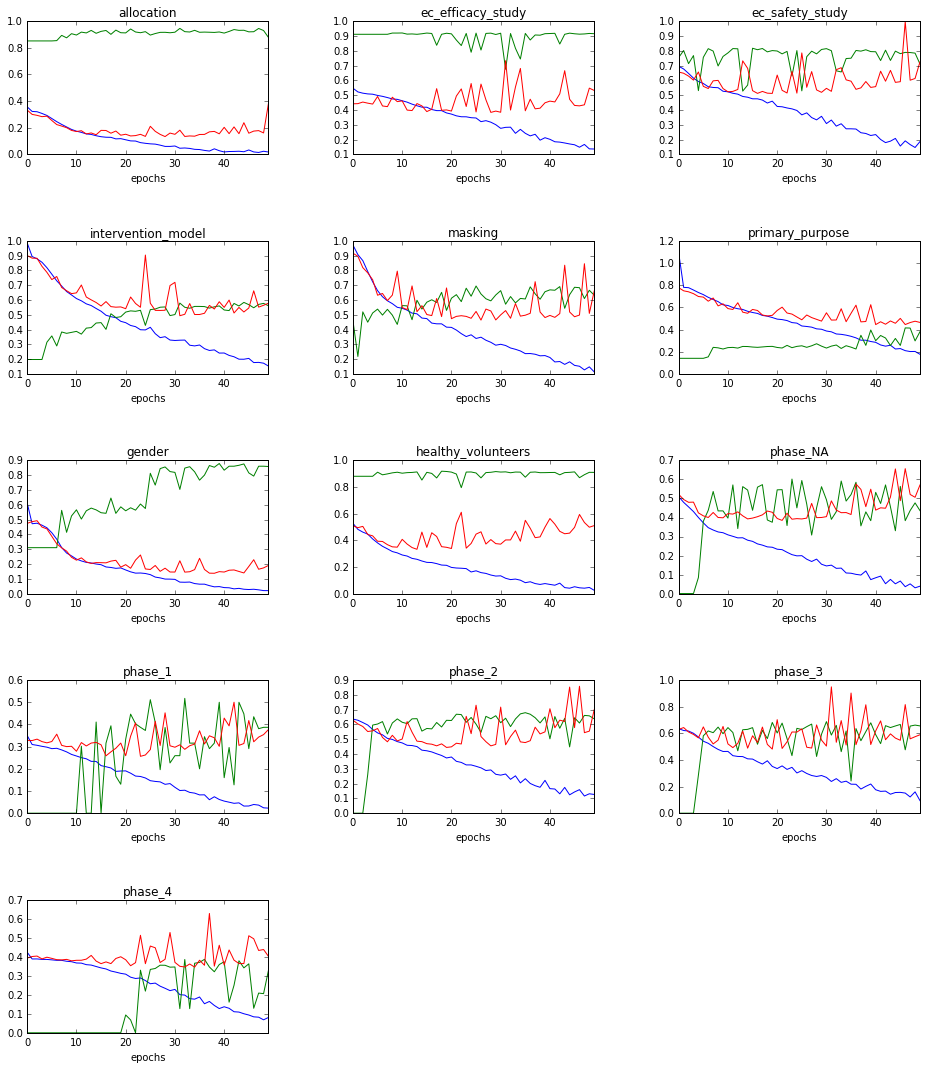

In [13]:
performances = performance_generator(files)

num_plots = len(files)

fig = plt.figure(figsize=(16, num_plots*2))
plt.clf()

for i, (target, score_dict) in enumerate(performances, start=1):
    
    axes = fig.add_subplot((num_plots+1)/2, 3, i)

    df = pd.DataFrame(score_dict)
    df.index.name = 'epochs'
    
    df.plot(ax=axes, title=target, legend=False)
    
fig.subplots_adjust(wspace=.35, hspace=.65)